## Jelena CAP394
####                      *The objectives of my study
####                      * The Data
####                      * Exploratory Data Analysis
####                      * ...

### The objectives of my study

Various paleoclimate studies confirmed that **Last Millennium** _(850 C.E -1850 C.E)_ is a period with important events and significant climate fluctuations such as the **Medieval Climate Anomaly(MCA)** and the **Little Ice Age(LIA)**.
Emerging scientific literature continues to report more evidence for the occurrence of both the **MCA** and **LIA** in South America.  
Therefore, it is crucial to examine climatic variability beyond the era of instrumental records through paleoclimate studies using **proxies** and modeling. 
Although, paleoclimate proxies may provide scarce, fragmented and local scale information, which limit the interpretation of past vegetational changes, they are unique evidences of past time and making **multiproxy compilation** could give us valuable insights. 
So my main task here is to look into several **speleothem** records from the South American and try to find signals or patterns
they have in common. 


### The Data

I have a set of 10 speleothem records all **CSV file format**. Each sheet corresponds to a cave in South America.
They are different in time span as well as in temporal resolution. 

You can find data [here](https://github.com/maxjel/Proxies/blob/master/botuvera.csv) and [here](https://github.com/maxjel/Proxies/blob/master/quelcaya.csv)

### Exploratory Data Analysis

Let's take a look at Botuvera cave and Quelcaya cave data set. 

In [1]:
import pandas as pd
pd.set_option('max_rows', 5)

In [2]:
df1 = 'botuvera.csv'
d1 = pd.read_csv(df1,index_col=0,parse_dates=[0])

In [3]:
print (d1.head)

<bound method NDFrame.head of          d18O1
age1          
 2009.5   35.1
 2009.0   35.1
...        ...
-7107.7   50.9
-7107.9   50.9

[49788 rows x 1 columns]>


In [4]:
df2 = 'quelcaya.csv'
d2 = pd.read_csv(df2,index_col=0,parse_dates=[0])

In [5]:
print (d2.head)

<bound method NDFrame.head of       d18O1
age1       
2009 -18.59
2008 -16.32
...     ...
227  -17.48
226  -18.12

[1784 rows x 1 columns]>


In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import numpy as np

(300, 2000)

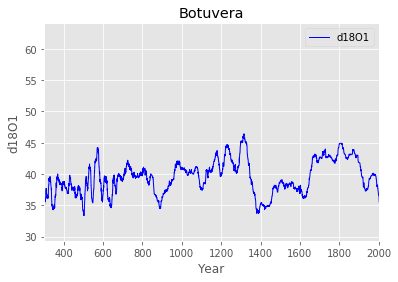

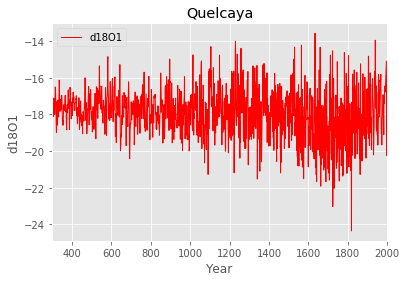

In [10]:
plot = d1.plot(title='Botuvera', lw=1, color='blue', marker='', markersize=3)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")
ax=plt.gca()
ax.set_xlim ([300,2000])

plot = d2.plot(title='Quelcaya', lw=1, color='red', marker='', markersize=3)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")
ax=plt.gca()
ax.set_xlim ([300,2000])
